In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from vocalseg.examples import canary
from vocalseg.utils import butter_bandpass_filter, spectrogram, int16tofloat32, plot_spec

In [8]:
# load data
rate, data = canary()
# filter data
data = butter_bandpass_filter(int16tofloat32(data), 500, 20000, rate)

In [9]:
figsize = (20,3)

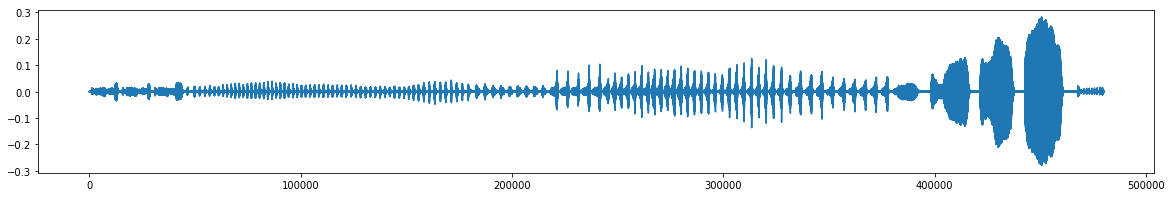

In [10]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(data)

### Generate spectrogram

In [11]:
### parameters
n_fft=4096
hop_length_ms=1
win_length_ms=4
ref_level_db=20
pre=0.97
min_level_db=-70
silence_threshold = 0.01
min_silence_for_spec=0.1
max_vocal_for_spec=1.0,
min_syllable_length_s = 0.01
spectral_range = [500, 20000]

In [12]:
spec = spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
)
np.shape(spec)

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


(2049, 10001)

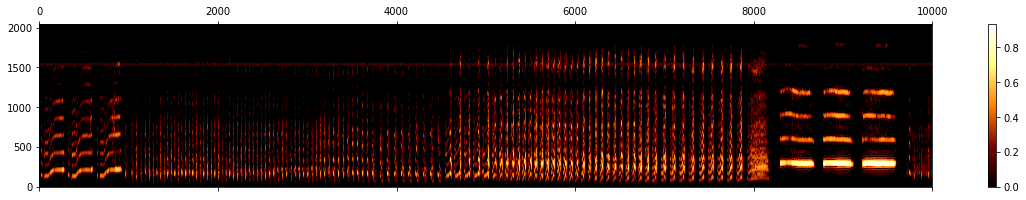

In [13]:
fig, ax = plt.subplots(figsize=figsize)
plot_spec(spec, fig, ax);

### generate spectrogram using dynamic thresholding

In [14]:
from vocalseg.dynamic_thresholding import dynamic_spectrogram

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [15]:
results = dynamic_spectrogram(
    data,
    rate,
    n_fft=n_fft,
    hop_length_ms=hop_length_ms,
    win_length_ms=win_length_ms,
    ref_level_db=ref_level_db,
    pre=pre,
    min_level_db=min_level_db,
    silence_threshold = silence_threshold,
    verbose=True,
    spectral_range = spectral_range,
    min_syllable_length_s = min_syllable_length_s
    
)
#print(len(results['onsets']))

longest silence 0.11500000000000021
longest vocalization 0.38899999999999935


/mnt/cube/tsainbur/Projects/github_repos/vocalization_segmentation/vocalseg/dynamic_thresholding.py:105: RuntimeWarning: invalid value encountered in sqrt
  vocal_envelope = np.max(spec, axis=0) * np.sqrt(np.mean(spec, axis=0))


In [16]:
figsize = (100, 4)

In [26]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

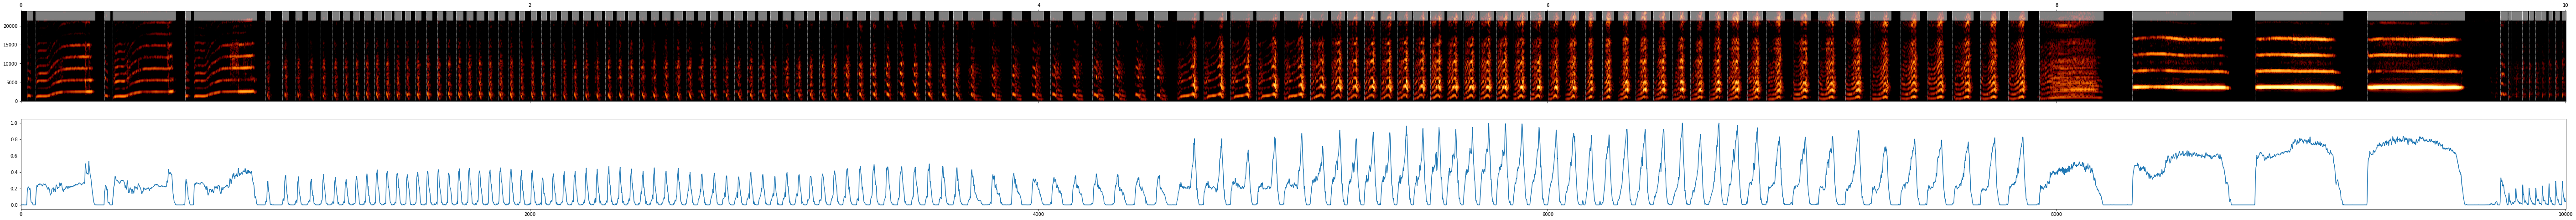

In [35]:
fig, axs = plt.subplots(nrows = 2, figsize=(figsize[0], figsize[1]*2))
plot_spec(results['spec'], fig, axs[0], rate = rate, hop_len_ms= hop_length_ms, show_cbar=False);
axs[1].plot(results['vocal_envelope'])
#axs[1].plot(results['vocal_envelope'] > silence_threshold)
axs[1].set_xlim([0, len(results['vocal_envelope'])])

ylmin, ylmax = (axs[0].get_ylim())
ysize = (ylmax - ylmin)*.1
ymin = ylmax- ysize

patches = []
for onset, offset in zip(results['onsets'], results['offsets']):
    axs[0].axvline(onset, color = '#FFFFFF', ls="dashed", lw=0.5)
    patches.append(Rectangle(xy=(onset, ymin), width = offset-onset, height = ysize))

collection = PatchCollection(patches, color='white', alpha=0.5)
axs[0].add_collection(collection);